In [2]:
import pandas as pd
import os
import glob
from pathlib import Path


In [5]:
# Set the path to your CSV files
csv_folder = "../../data/news/csv/"
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

file_count = len(csv_files)
print(f"Found {file_count} CSV files:")
if file_count == 0:
    print("Found 0 CSV files:")
else:
    for file in csv_files:
        print(f"  - {os.path.basename(file)}")


Found 30 CSV files:
  - abb.csv
  - Alcon.csv
  - alpine.csv
  - aryzta.csv
  - Baloise.csv
  - BKW Energie.csv
  - BLKB.csv
  - emmi.csv
  - Givaudan.csv
  - helvetia.csv
  - holcim.csv
  - Julius_Baer.csv
  - Landis.csv
  - Logitech.csv
  - Lonza.csv
  - nestle.csv
  - novartis.csv
  - Reishauer.csv
  - richemont.csv
  - roche.csv
  - santhera.csv
  - Swatch.csv
  - swisscom.csv
  - swisslife.csv
  - swissquote.csv
  - SwissRe.csv
  - swiss_prime_site.csv
  - ubs_ag.csv
  - Vontobel.csv
  - zurich_insurance.csv


In [6]:
# Function to read and combine all CSV files
def combine_csv_files(csv_files, sample_size=None):
    """
    Combine all CSV files into one DataFrame
    
    Args:
        csv_files: List of CSV file paths
        sample_size: Optional number of rows to sample from each file (for testing)
    
    Returns:
        Combined DataFrame
    """
    combined_data = []
    
    for i, file_path in enumerate(csv_files):
        print(f"Processing file {i+1}/{len(csv_files)}: {os.path.basename(file_path)}")
        
        try:
            # Read CSV file
            if sample_size:
                # Read only first few rows for testing
                df = pd.read_csv(file_path, nrows=sample_size)
            else:
                df = pd.read_csv(file_path)
            
            # Add source file information
            df['source_file'] = os.path.basename(file_path)
            
            # Add company name (extract from filename)
            company_name = os.path.basename(file_path).replace('.csv', '')
            df['company'] = company_name
            
            combined_data.append(df)
            print(f"  - Loaded {len(df)} rows")
            
        except Exception as e:
            print(f"  - Error reading {file_path}: {str(e)}")
            continue
    
    if combined_data:
        # Combine all DataFrames
        final_df = pd.concat(combined_data, ignore_index=True)
        print(f"\nCombined dataset shape: {final_df.shape}")
        return final_df
    else:
        print("No data was successfully loaded!")
        return None


In [7]:
# First, let's test with a small sample to understand the data structure
print("Testing with sample data (first 100 rows from each file):")
sample_df = combine_csv_files(csv_files, sample_size=100)

if sample_df is not None:
    print("\nSample data info:")
    print(f"Columns: {list(sample_df.columns)}")
    print(f"\nFirst few rows:")
    print(sample_df.head())
    
    print(f"\nData types:")
    print(sample_df.dtypes)
    
    print(f"\nCompany distribution:")
    print(sample_df['company'].value_counts())


Testing with sample data (first 100 rows from each file):
Processing file 1/30: abb.csv
  - Loaded 100 rows
Processing file 2/30: Alcon.csv
  - Loaded 100 rows
Processing file 3/30: alpine.csv
  - Loaded 100 rows
Processing file 4/30: aryzta.csv
  - Loaded 100 rows
Processing file 5/30: Baloise.csv
  - Loaded 100 rows
Processing file 6/30: BKW Energie.csv
  - Loaded 100 rows
Processing file 7/30: BLKB.csv
  - Loaded 100 rows
Processing file 8/30: emmi.csv
  - Loaded 100 rows
Processing file 9/30: Givaudan.csv
  - Loaded 100 rows
Processing file 10/30: helvetia.csv
  - Loaded 100 rows
Processing file 11/30: holcim.csv
  - Loaded 100 rows
Processing file 12/30: Julius_Baer.csv
  - Loaded 100 rows
Processing file 13/30: Landis.csv
  - Loaded 100 rows
Processing file 14/30: Logitech.csv
  - Loaded 100 rows
Processing file 15/30: Lonza.csv
  - Loaded 100 rows
Processing file 16/30: nestle.csv
  - Loaded 100 rows
Processing file 17/30: novartis.csv
  - Loaded 100 rows
Processing file 18/30: 

In [8]:
sample_df.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company
0,2022-02-01 06:30:02+01,de,4542.0,cash.ch,4-Wochenvorschau Schweiz,Nachfolgend die wichtigsten Wirtschafts- und F...,abb.csv,abb
1,2024-02-23 12:49:11+01,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,abb
2,2022-09-30 08:37:00+02,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,abb
3,2019-07-01 13:38:19+02,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb
4,2019-07-01 13:38:19+02,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb


In [17]:
# If the sample looks good, run the full combination
# WARNING: This might take a while and use a lot of memory for large files
print("Combining all CSV files (this may take a while)...")
full_df = combine_csv_files(csv_files)

if full_df is not None:
    print(f"\nFinal combined dataset:")
    print(f"Shape: {full_df.shape}")
    print(f"Memory usage: {full_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    



Combining all CSV files (this may take a while)...
Processing file 1/30: abb.csv
  - Loaded 29072 rows
Processing file 2/30: Alcon.csv
  - Loaded 9852 rows
Processing file 3/30: alpine.csv
  - Loaded 420 rows
Processing file 4/30: aryzta.csv
  - Loaded 5572 rows
Processing file 5/30: Baloise.csv
  - Loaded 6955 rows
Processing file 6/30: BKW Energie.csv
  - Loaded 16420 rows
Processing file 7/30: BLKB.csv
  - Loaded 2593 rows
Processing file 8/30: emmi.csv
  - Loaded 9735 rows
Processing file 9/30: Givaudan.csv
  - Loaded 9982 rows
Processing file 10/30: helvetia.csv
  - Loaded 23018 rows
Processing file 11/30: holcim.csv
  - Loaded 14817 rows
Processing file 12/30: Julius_Baer.csv
  - Loaded 32331 rows
Processing file 13/30: Landis.csv
  - Loaded 5623 rows
Processing file 14/30: Logitech.csv
  - Loaded 14850 rows
Processing file 15/30: Lonza.csv
  - Loaded 22876 rows
Processing file 16/30: nestle.csv
  - Loaded 57465 rows
Processing file 17/30: novartis.csv
  - Loaded 3583 rows
Proces

In [18]:
full_df.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company
0,2022-02-01 06:30:02+01,de,4542.0,cash.ch,4-Wochenvorschau Schweiz,Nachfolgend die wichtigsten Wirtschafts- und F...,abb.csv,abb
1,2024-02-23 12:49:11+01,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,abb
2,2022-09-30 08:37:00+02,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,abb
3,2019-07-01 13:38:19+02,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb
4,2019-07-01 13:38:19+02,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb


In [19]:
full_df.shape

(635600, 8)

In [20]:
# Remove unnecessary spaces from 'head_clean', 'content_clean', and 'medium_name' columns.
full_df['head_clean'] = full_df['head_clean'].str.strip()
full_df['content_clean'] = full_df['content_clean'].str.strip()
full_df['medium_name'] = full_df['medium_name'].str.strip()

# Check for duplicates and remove them
initial_count = len(full_df)
full_df.drop_duplicates(inplace=True)
duplicates_removed = initial_count - len(full_df)

print(f"Removed {duplicates_removed} duplicate rows.")

Removed 2502 duplicate rows.


In [21]:
# Check for duplicates and remove them
initial_count = len(full_df)
full_df.drop_duplicates(subset=['content_clean'], inplace=True)
duplicates_removed = initial_count - len(full_df)

print(f"Removed {duplicates_removed} duplicate rows.")

Removed 386649 duplicate rows.


In [22]:
full_df.shape

(246449, 8)

In [23]:
full_df.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company
0,2022-02-01 06:30:02+01,de,4542.0,cash.ch,4-Wochenvorschau Schweiz,Nachfolgend die wichtigsten Wirtschafts- und F...,abb.csv,abb
1,2024-02-23 12:49:11+01,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,abb
2,2022-09-30 08:37:00+02,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,abb
3,2019-07-01 13:38:19+02,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb
5,2020-06-15 17:18:00+02,de,25171.0,cash.ch,+++Börsen-Ticker+++ - US-Börsen notieren deutl...,"16:50 Im Dow-Jones-Index , der 1,6 Prozent im ...",abb.csv,abb


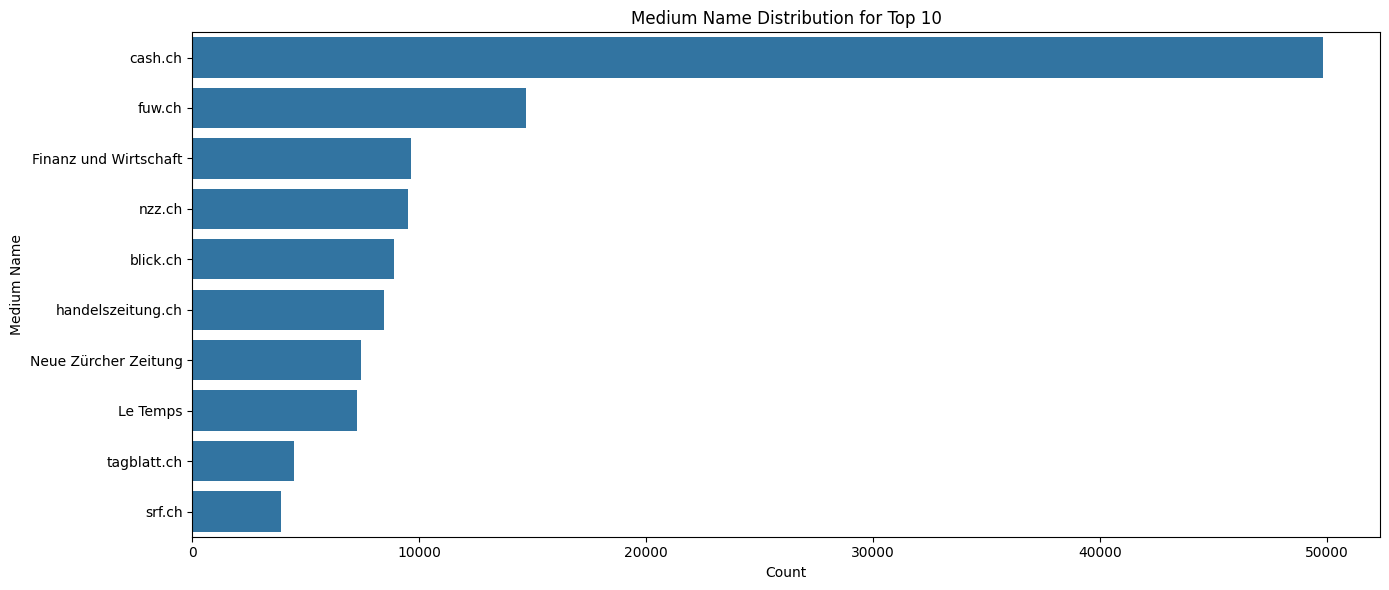

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
top_10_medium_names = full_df['medium_name'].value_counts().nlargest(10).index
sns.countplot(data=full_df, y='medium_name', order=top_10_medium_names)
plt.title('Medium Name Distribution for Top 10')
plt.xlabel('Count')
plt.ylabel('Medium Name')
plt.tight_layout()
plt.show()


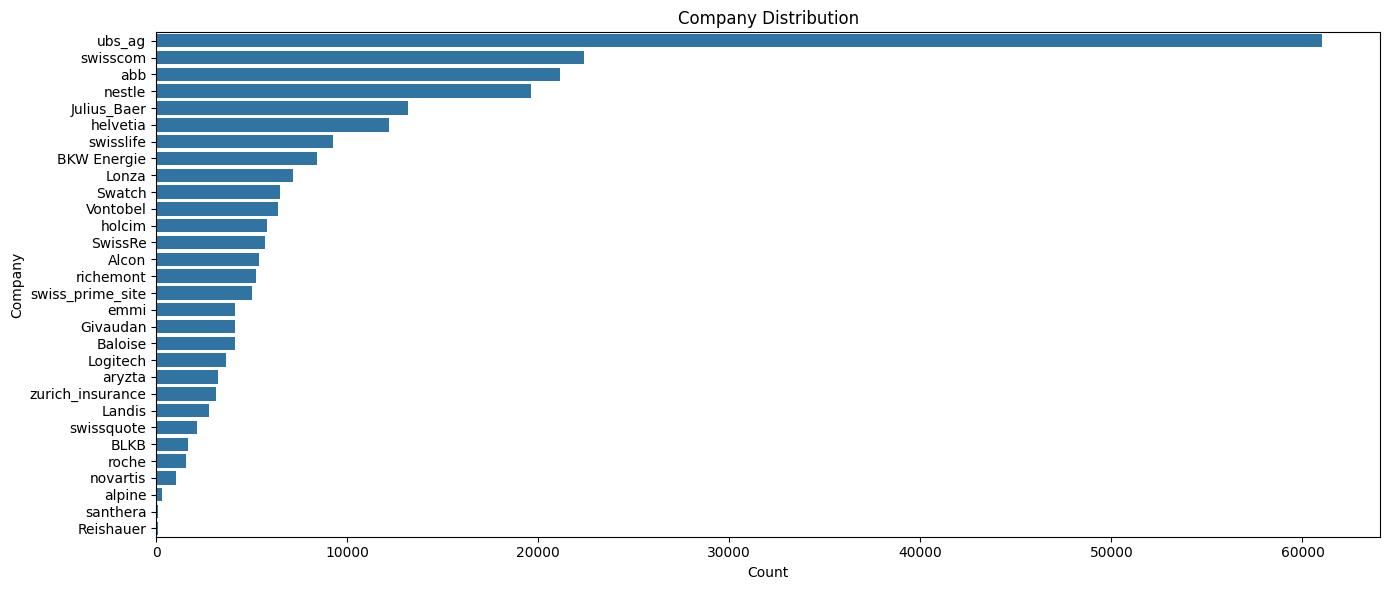

In [54]:
plt.figure(figsize=(14, 6))
top_10_companies = full_df['company'].value_counts().nlargest(30).index
sns.countplot(data=full_df, y='company', order=top_10_companies)
plt.title('Company Distribution')
plt.xlabel('Count')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

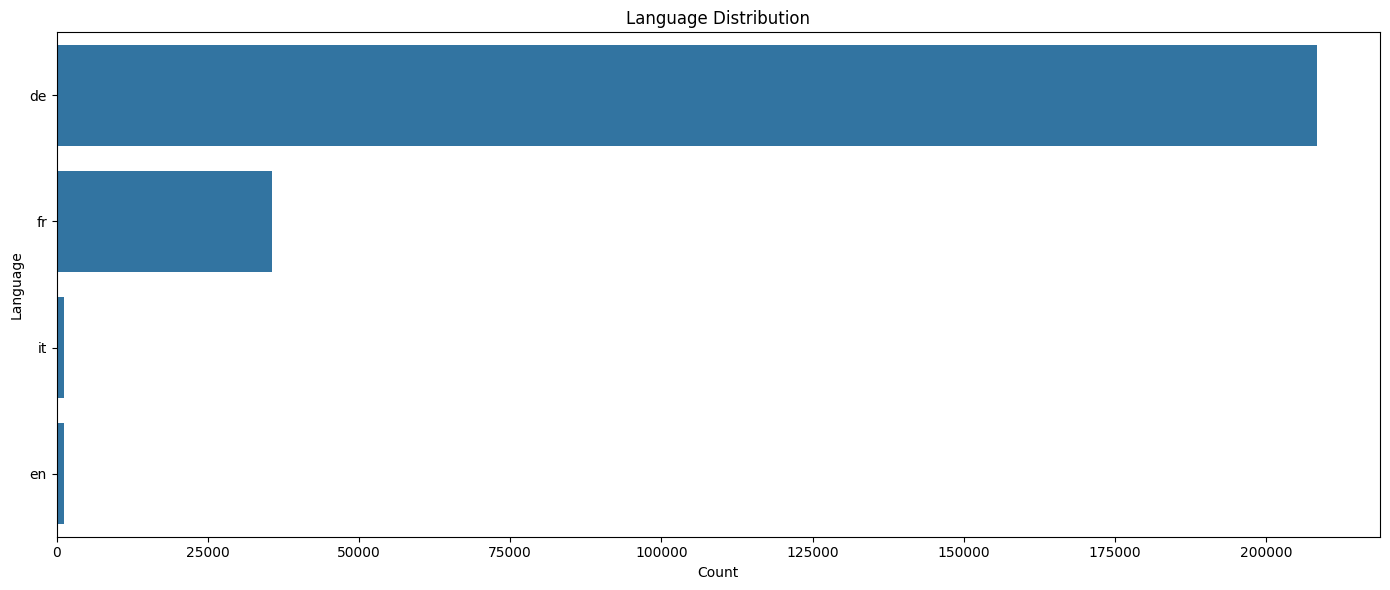

In [63]:
plt.figure(figsize=(14, 6))
language_counts = full_df['language'].value_counts()
language_counts = language_counts.sort_values(ascending=False)
plt.figure(figsize=(14, 6))
language_counts = full_df['language'].value_counts()
language_counts = language_counts.sort_values(ascending=False)
sns.barplot(x=language_counts.values, y=language_counts.index, orient='h')
plt.title('Language Distribution')
plt.xlabel('Count')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

In [64]:
# Sum up the total character count for articles in languages 'de', 'it', and 'fr'
total_chars = full_df[full_df['language'].isin(['de', 'it', 'fr'])]['char_count'].sum()
print("Total characters for 'de', 'it', 'fr' languages:", total_chars)


Total characters for 'de', 'it', 'fr' languages: 1783590692.0


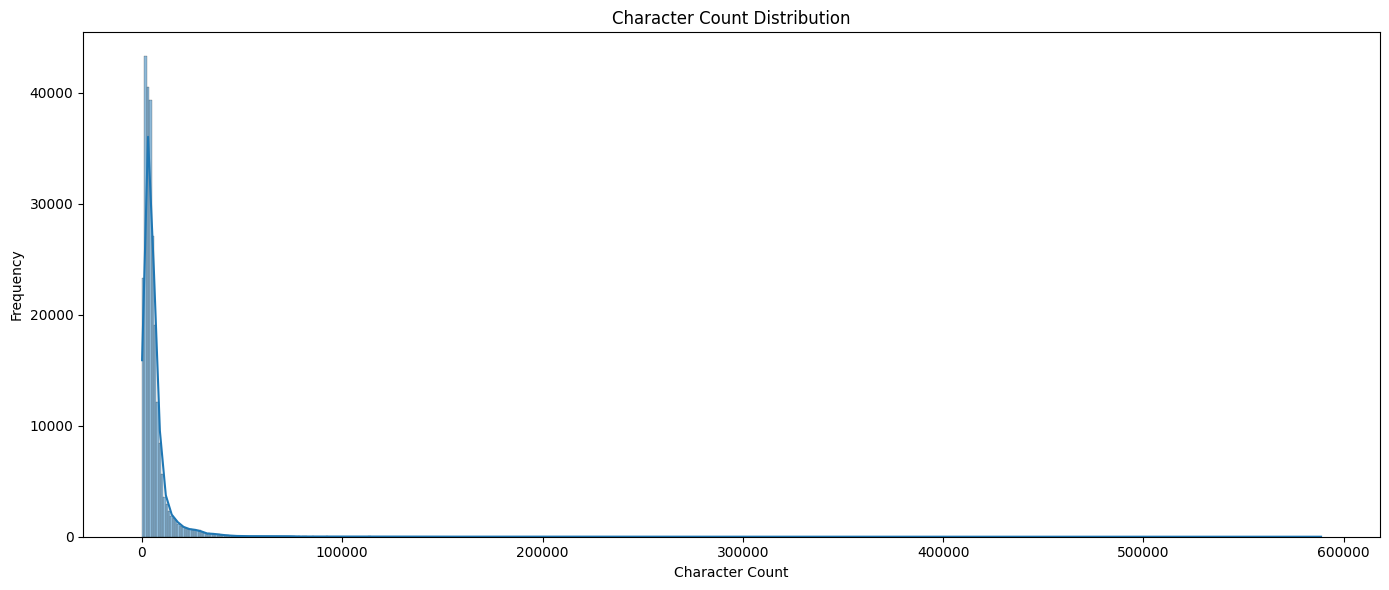

In [39]:
# Plot Distribution of char count for each company
plt.figure(figsize=(14, 6))
sns.histplot(data=full_df, x='char_count', bins=500, kde=True)
plt.title(f'Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [58]:
# Ensure 'pubtime' is in datetime format and handle mixed time zones
full_df['pubtime'] = pd.to_datetime(full_df['pubtime'], errors='coerce', utc=True)

# Extract the year and month from the 'pubtime' column
full_df['year'] = full_df['pubtime'].dt.year
full_df['month'] = full_df['pubtime'].dt.month


In [59]:
full_df.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company,year,month
0,2022-02-01 05:30:02+00:00,de,4542.0,cash.ch,4-Wochenvorschau Schweiz,Nachfolgend die wichtigsten Wirtschafts- und F...,abb.csv,abb,2022,2
1,2024-02-23 11:49:11+00:00,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,abb,2024,2
2,2022-09-30 06:37:00+00:00,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,abb,2022,9
3,2019-07-01 11:38:19+00:00,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,abb,2019,7
5,2020-06-15 15:18:00+00:00,de,25171.0,cash.ch,+++Börsen-Ticker+++ - US-Börsen notieren deutl...,"16:50 Im Dow-Jones-Index , der 1,6 Prozent im ...",abb.csv,abb,2020,6


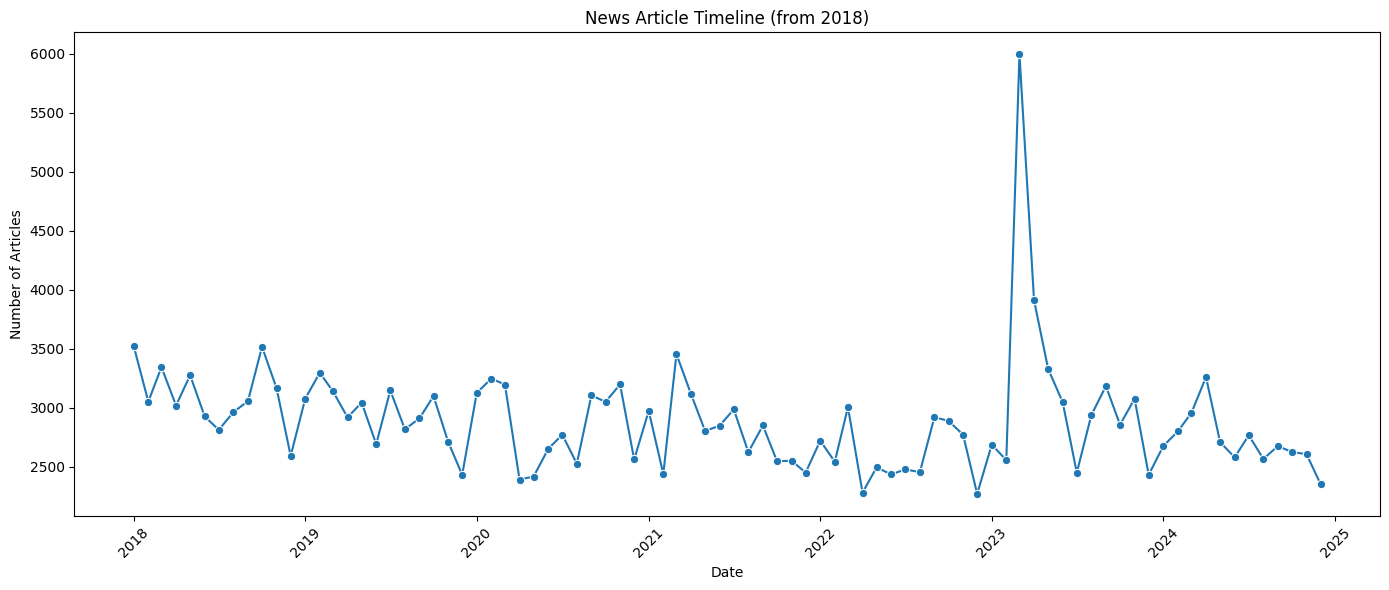

In [61]:
# Generate a timeline of news articles starting from 2018 by plotting the number of articles per month over the years

plt.figure(figsize=(14, 6))

# Filter data starting from the year 2018
filtered_df = full_df[full_df['year'] >= 2018]

# Group by year and month to count articles
timeline = filtered_df.groupby(['year', 'month']).size().reset_index(name='article_count')

# Create a datetime index for plotting
timeline['date'] = pd.to_datetime(timeline[['year', 'month']].assign(day=1))

# Plot the timeline
sns.lineplot(data=timeline, x='date', y='article_count', marker='o')

plt.title('News Article Timeline (from 2018)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
# Save the combined dataset
output_path = "../../data/news/combined_news_dataset.csv"
print(f"\nSaving combined dataset to: {output_path}")
full_df.to_csv(output_path, index=False)
print("Dataset saved successfully!")

# Also save as parquet for better performance
parquet_path = "../../data/news/combined_news_dataset.parquet"
print(f"Saving as parquet to: {parquet_path}")
full_df.to_parquet(parquet_path, index=False)
print("Parquet file saved successfully!")



Saving combined dataset to: ../../data/news/combined_news_dataset.csv
Dataset saved successfully!
Saving as parquet to: ../../data/news/combined_news_dataset.parquet
Parquet file saved successfully!
